<img src="../figures/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Oracle Algorithms
</td></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [5]:
import sys
sys.path.append('../')
import macro_tQ as tQ
import numpy as np

# Introduction

- The potential of quantum computing lies in our ability to create states that concentrate the solution to a problem in one or several amplitudes.

- In this way, a small number of executions will   reveal the sought for information.

- The focus then shifts into that of *finding the appropriate problems*.

- An important class of problems consists of *unveiling* some property of a certain function. The only allowed tak to fulfill this task is to query this function as many times as necessary. Otherwise, it is a *black box*. For this reason, these functions are called *oracles*.

*Example:* 

We will denote the set $S_n =\{0,1,...2^n-1 \}\sim \{0,1\}^n$ interchangeably.

The unitary implementation of a binary function $f:S_n \to S_1$ is performed in the form of a controlled operator

$$
{U_f} : \ket{x}_n\otimes \ket{y} \to \ket{x}_n\otimes \ket{y + f(x)}
$$

In particular, if $\ket{y} = \ket{-}$ we will have the oracle $f(x)$ encoded in the phase.

Let's study the following circuit


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="./figuras/Busqueda_Oraculo.png" align=center width='60%'/>
<center></center>
</center></figure>
<br>

The ingredients that quantum computing offers us to try to gain a computational advantage are:

- parallelism ($\to $ evaluate the oracle on **all** elements of the base simultaneously)

- encoding the oracle in **the phase** (phase kickback)

- interference to **concentrate** the information in some amplitudes.


Let's evaluate the state at the output

\begin{eqnarray}
\ket{\psi_0} &=& \ket{0}_n \otimes \ket{-} \nonumber\\
\rule{0mm}{15mm}
&\stackrel{W_{n}}{\longrightarrow} & \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{-} ~~~~\hbox{ parallelism}  \nonumber \\
\rule{0mm}{12mm}
&\stackrel{U_f}{\longrightarrow} &  \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}\ket{x}\otimes (-1)^{f(x)} \ket{-} ~~~~ \hbox{ oracle encoding in the phase}
\end{eqnarray}

\begin{eqnarray}
&\stackrel{W_{n}}{\longrightarrow} &   \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1}(-1)^{f(x)}(H^{\otimes n}\ket{x})\otimes  \ket{-}   \nonumber\\
\rule{0mm}{12mm}
&=&   \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ x \cdot y}\ket{y}\otimes \ket{-}   ~~~~ \hbox{interference } 
\hspace{2.8cm}
\end{eqnarray}
<br>
where
$$x\cdot y = x_{n-1}y_{n-1} \oplus x_{n-2}y_{n-2} \oplus ...  \oplus x_{0}y_{0}$$ 


the final result is a factored state. Therefore, we can measure the first factor independently and forget about the second

$$
\ket{\Phi} =  \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ x \cdot y}\ket{y}
$$

depending on how $f(x)$ is, we can achieve *interferences* that concentrate the probability in some state

# The Deutsch-Josza Problem


- **Promise**: $f$ belongs to one of the following two classes: *constant* ($C \Rightarrow f(x)$ is the same for all $x$) or *balanced* ($E \Rightarrow f(x)$ is the same for half)

<br>

- **Problem**: determine if $f$ is of class $C$ or $E$

<br>

<div class="alert alert-block alert-danger">
<b>Note:</b> $~$ classically: we would need to invoke the oracle $2^n/2+1$ times. That is, at least up to half of the possible input values, plus one.
</div>



-  **Solution**: we run the circuit once and measure on the state $~\ket{\Phi}$ 

<br>
<br>

<table width="100%"><td style="font-size:120%px;font-style:roman;text-align:left;">
    $\to ~$ if $f \in C$ is <b>constant</b>  $~\Rightarrow~ f(x) = f_0 ~\forall x ~~~\Rightarrow~~~$ the probability of obtaining $ \ket{0^n}~$ is  $ 1$  
<br>
</table>


*Test:*  

\begin{eqnarray}
p_{0} &=& |\braket{0^n}{\Phi}|^2 \nonumber\\ \rule{0mm}{12mm}
&=& \left\vert \bra{0^n} \sum_{y=0}^{2^n-1}\left( \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f_0 + x \cdot y} \right)\ket{y} \right\vert^2
 \nonumber\\ \rule{0mm}{12mm}
 &=& \left\vert \frac{(-1)^{f_0}}{2^{n}}   \sum_{x=0}^{2^n-1} (-1)^{x \cdot 0}\right\vert^2    \\ \rule{0mm}{15mm}
 &=& (-1)^{2f_0} \\ \rule{0mm}{15mm} &=& 1 
\nonumber 
\end{eqnarray}




<table width="100%"><td style="font-size:120%px;font-style:roman;text-align:left;">
$\to ~ $    if $f\in E$ is <b>balanced</b> $~\Rightarrow~$ the probability of obtaining $~\ket{0^n}~$  is $~0~$
</table>




In this case $f(x)=\pm 1$ is distributed evenly $~\Rightarrow$
<br>

\begin{eqnarray}
\braket{0^n}{\Phi} &=& \bra{0^n} \sum_{y=0}^{2^n-1}\left( \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x) + x \cdot y} \right)\ket{y} \nonumber\\ \rule{0mm}{15mm}
 &=&  \frac{1}{2^{n}} \sum_{x=0}^{2^n-1} (-1)^{f(x) + x \cdot 0}    = 0
\nonumber \\
 &=&  \frac{1}{2^{n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)}    = 0
\end{eqnarray}

since, by hypothesis, there is an equal number of values $f(x)=0$ as there are $f(x)=1$ in the sum.



<br>
<br>

<div class="alert alert-block alert-success">
<b>Exercise 2.1.1.1 </b> 
    
There are only two constant oracles, $f(x)=0~$ or $~f(x) = 1$ for all $x$. 
    
<br>

There are many balanced oracles, and in the previous lesson, you should have built a circuit to generate them.
    
<br>
    
Build the Deutsch-Josza circuit and test it with these oracles. 
</div>


# The Bernstein-Vazirani Problem



-  **Promise**: $f$ is a *linear function*, defined by a bit string $a \in \{0,1\}^n$
<br>
$$f_a(x) = a\cdot x  = a_{n-1} x_{n-1} \oplus ....\oplus a_0 x_0$$
<br>

- **Problem**: find $a = a_{n-1} \ldots a_0$ 

<br>
<br>

<div class="alert alert-block alert-danger">
 Classically, we would need to invoke the oracle $n$ times. 
 For example, $f(0\cdots 0 1)=0,1$ reveals $a_0=0,1$ respectively.
Iteratively $f(0\cdots 0 1 0)\to a_1$, $ f(0\cdots 1 0 0)\to a_2 \cdots$, etc.
</div>


**Solution**: run the circuit once and measure the final state

\begin{eqnarray}
\ket{\Phi} &=& \frac{1}{2^n} \sum_{x,y=0}^{2^n-1}(-1)^{f(x)+ y \cdot x}\ket{y}
=  
\frac{1}{2^n}\sum_{y=0}^{2^n-1} \left(\sum_{x=0}^{2^n-1}(-1)^{(a+y)\cdot x}\right)\ket{y} ~\nonumber\\  \rule{0mm}{10mm}
&=&  
\frac{1}{2^n}\sum_{y=0}^{2^n-1} \left(\sum_{x=0}^{2^n-1}(-1)^{(-a+y)\cdot x}\right)\ket{y}\nonumber\\ \rule{0mm}{10mm}
 &=&  \frac{1}{2^n} \sum_{y=0}^{2^n-1} 2^n \delta_{(-a+y),0} \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=& \rule{0mm}{5mm} \ket{a_0a_1\cdots a_{n-1}} \nonumber 
\end{eqnarray}

A **single** measurement of the final state gives $a$!


<div class="alert alert-block alert-warning">
    <b>Note:</b> 
    in both cases, the <i>key</i> is to <i>concentrate</i> the probability of the solution in the amplitude of a single state.     
</div>


## Implementation

first, we generate a linear oracle $f(x)=x\cdot a$ with a hidden string $a=(a_{n-1},\ldots a_0)$ of length $n$

cadena oculta= 0011


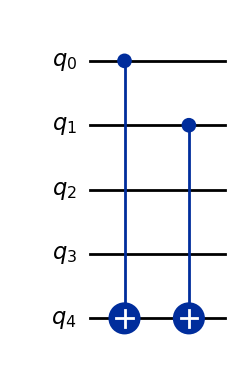

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def random_linear_oracle(n):  #n es la longitud de la cadena a oculta
    import random, string
    a = ''.join(random.choices(['0','1'], k=n))
    print('cadena oculta=',a)  
    qc = QuantumCircuit(n+1) # el ultimo registro es la salida |f(x)> = |a.x>
    
    for i, ai in enumerate(reversed(a)):  # ponemos reversed para usar el convenio de qiskit
        if ai == '1':
            qc.cx(i,n)    
    return qc


n = 4

linear_oracle = random_linear_oracle(n)

linear_oracle.draw('mpl')


Now we implement the oracle in the Bernstein Vazirani algorithm

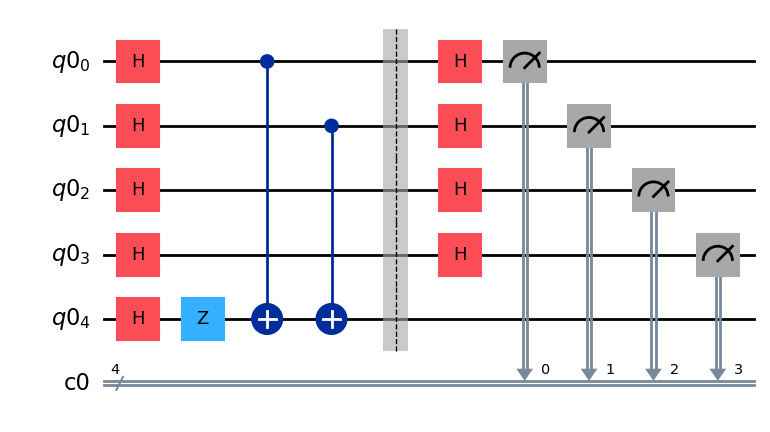

In [3]:
from qiskit.circuit.library.standard_gates import HGate

def BV_circuit(linear_oracle, n):
    #n: número de bits
    #a: coeficiente oculto
    #return: circuito
    qreg = QuantumRegister(n + 1)
    creg = ClassicalRegister(n)
    qc = QuantumCircuit(qreg, creg)

    qc.h(qreg)  # Hacemos máxima superposición con la puerta W
    qc.z(qreg[-1])  # Ponemos el último qubit en el estado |->

    qc.compose(linear_oracle, qreg[:], inplace=True)  # añadimos el oráculo lineal con la cadena oculta

    qc.barrier()
    qc.h(qreg[0:-1])  # Aplicamos Hadamard de nuevo
    #qc.barrier()
    qc.measure(qreg[0:-1], creg)

    return qc

qc = BV_circuit(linear_oracle, n)
qc.draw(output='mpl')

now we can extract the string $a$ in *a single invocation* of the oracle

In [4]:

counts = backend.run(transpile(qc,backend),shots = 1).result().get_counts()


plot_histogram(counts) # Mostramos un histograma de resultados



NameError: name 'backend' is not defined

<div class="alert alert-block alert-warning">

<b>Why does the Bernstein Vazirani algorithm work?</b>

Suppose that $a = 01011$ and that the oracle implementing the linear function is 
<br>
<br>    
<center>
<img src="./figures/BV_circuit.png" width='30%' style='margin:automatic'/>
</center>

<br>    
Inserting this oracle into the search algorithm, and 
<br>
    
-  remembering that $\ket{-} = H \ket{1}$ 
<br>
-  using the circuit equivalence 


it is easy to recognize that it is equivalent to the following

<center>
<img src="./figures/Bernstein_Vazirani_trick.png" width='20%' style='margin:automatic'/>
</center>
    
</div>

The previous algorithms are *deterministic*. Let's look at an algorithm that provides an exponential advantage but in a *probabilistic* manner.

# Simon's Problem  


Let us *now* consider a function $f:\{0,1\}^n \to \{0,1\}^n$ with the following property

-  **Promise**: $f$ is *doubly valued and periodic* under *bitwise* addition. 


that is $~\Rightarrow ~$ there exists an $~s\in \{0,1\}^n ~$ such that $~~\forall x$
$$
 f(x) = f(x\oplus s) ~~~~~
$$

Example: <br>
$$
\begin{array}{|c|c || c | c | }
\hline
x & f(x) & & x & f(x) \\  \hline
0000 & 1111 && 1000 & 0101 \\ \hline
0001 & 1011 && 1001 & 0100 \\ \hline
0010 & 0011 && 1010 & 0000 \\ \hline
0011 & 1000 && 1011 & 1110 \\ \hline
0100 & 0101 && 1100 & 1111 \\ \hline
0101 & 0100 && 1101 & 1011 \\ \hline
0110 & 0000 && 1110 & 0011 \\ \hline
0111 & 1110 && 1111 & 1000 \\ \hline
\hline
\end{array}
$$


-  **Problem**: find $s$ with the minimum number of oracle queries

<div class="alert alert-block alert-danger">
<b>Note:</b>  $~$  <i>classically</i>: we would need to inspect ${\cal O}(n 2^n)$ terms
</div>


The circuit is *the same*, but now involves $n$ qubits to encode the *image* of $f$
<br>
<br>
<br>

<center>
<img src="./figuras/SimonCircuit.png" width='55%' style='margin:automatic'/>
</center>

Note the difference with the previous cases:

-   now in the ancilla input we put $\ket{0}_n$ <br>
$\Rightarrow$ as a consequence the oracle applies $f(x)$ in a *boolean* way


$$
U_f \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{0}  = \sum_{x=0}^{2^n-1}\ket{x}\otimes \ket{f(x)}
$$




- after applying the oracle, the state is entangled! 
<br>
$\Rightarrow$ if we measure the second register 
  the n-qubit in the second register will collapse to a certain state 
$~\ket{f(x_0)} $



- by virtue of the *promise* $\ket{f(x_0)} = \ket{f(x_0\oplus s)}$, the first register will collapse to a *superposition of two states*  
<br>
<br>
$$
\ket{\psi} = \frac{1}{\sqrt{2}} \left( \rule{0mm}{4mm} \ket{x_0} + \ket{x_0 \oplus s} \right)
$$
<br>
just before the barrier


- following the circuit, we apply the Walsh-Hadamard gate to the first register again

\begin{eqnarray}
H^{\otimes n} \frac{1}{\sqrt{2}} \left( \rule{0mm}{4mm} \ket{x_0} + \ket{x_0 \oplus s} \right) &=& \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1} \left[ (-1)^{x_0\cdot y} + (-1)^{(x_0\oplus s) \cdot y}\right]  \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=& \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1} \left[ (-1)^{x_0\cdot y} + (-1)^{x_0 \cdot y}(-1)^{ s \cdot y}\right]  \ket{y} \nonumber\\ \rule{0mm}{10mm}
&=&  \frac{1}{\sqrt{2^{n+1}}} \sum_{y=0}^{2^n-1}(-1)^{x_0\cdot y}  \left( \rule{0mm}{6mm} 1+ (-1)^{s \cdot y}\right) \ket{y}
\end{eqnarray}


Observe the factor

$$
\frac{1}{2}\left( \rule{0mm}{3mm} 1+ (-1)^{s \cdot y}\right)~~ = ~~ 
\left\{\begin{array}{ccc} 0 &\hbox{if}&  s \cdot y\, (\hbox{mod 2}) = 1 \\ 1 &\hbox{if} & s\cdot y\, (\hbox{mod 2}) = 0\end{array}
\right.
$$ 

makes **only those** $\ket{y}$ with $s\cdot y\,  (\hbox{mod 2})= 0$ **have non-zero amplitude**

By measuring repeatedly, the first record we will obtain a series of n-bits $ y^{(a)} = y^{(1)},y^{(2)},...,y^{(n)}$ all of which satisfy
a homogeneous system of $n$ linear equations


\begin{eqnarray}
s\cdot y^{(1)} (\hbox{mod(2)})~=~ s_{n-1}y^{(1)}_{n-1} \oplus s_{n-2}y^{(1)}_{n-2} \oplus \ldots \oplus s_0 y^{(1)}_0  &~=~& 0 \nonumber\\ \rule{0mm}{8mm}
s\cdot y^{(2)} (\hbox{mod(2)}) ~=~ s_{n-1}y^{(2)}_{n-1} \oplus s_{n-2}y^{(2)}_{n-2} \oplus \ldots \oplus s_0 y^{(2)}_0 &~=~& 0 \nonumber\\
\vdots & & \nonumber\\ \rule{0mm}{10mm}
s\cdot y^{(n)} (\hbox{mod(2)}) ~=~ s_{n-1}y^{(p)}_{n-1} \oplus s_{n-2}y^{(n)}_{n-2} \oplus \ldots \oplus s_0 y^{(n)}_0 &~=~& 0 \nonumber\\
\end{eqnarray}

<br>
where all sums are understood modulo two.
On one hand, $s=s_{n-1}\ldots s_0$ are our unknowns and, on the other, $y^{(a)} = y^{(a)}_{n-1}\ldots y^{(a)}_0$ are the known coefficients as a result of the measurements.

Since we need to find out the $n$ bits that make up the solution $s$, we will need at least $n$ linearly independent equations

<div class="alert alert-block alert-danger",text-align:center>
<b> Note</b>:
    
    
1. There is no guarantee that the bit strings $y$ obtained in the different evaluations of the circuit are always different from each other. 
Therefore, in general, to obtain a solvable linear system, it will be necessary to run the circuit more times than $n$. 
    
This is why Simon's algorithm is <i>probabilistic</i>
    
2. The distribution of amplitudes that are null or not is independent of $x_0$ and, therefore, of the result $\ket{f(x_0)}$ measured in the second register. Thus, we can ignore it.    
</div>, 

We are going to study the same function that we used in the previous lesson to encode an arbitrary oracle given by a truth table *f_outputs*.

The promise is that this function contains only one period. We will try to find it.

In [ ]:
# promesa: esta función contiene un periodo binario
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

# creamos el oráculo y lo transformamos en una puerta 
simon_oracle_gate = tQ.binary_function(f_outputs).to_gate()

# verificamos que se trata de una función de n en n bits
n_input = int(np.log2(len(f_outputs))) #número de outputs
m_output =len(f_outputs[0])            #longitud de cada output
assert(n_input == m_output)



In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
n=n_input

qr_in = QuantumRegister(n, name='x')
qr_out = QuantumRegister(n, name='f(x)')
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr_in,qr_out,cr)


qc.h(qr_in)
qc.append(simon_oracle_gate,qr_in[:]+qr_out[:])

#qc.measure(qr_out,cr)
#qc.barrier()

qc.h(qr_in)
qc.measure(qr_in,cr)

qc.draw('mpl')

## Verification

In [ ]:
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator()

nshots = 100

qct = transpile(qc,backend)
#display(qct.draw('mpl'))

counts = backend.run(qct,shots = nshots).result().get_counts()

print(counts)

from qiskit.visualization import plot_histogram

plot_histogram(counts) # Mostramos un histograma de resultados

In [ ]:
def solve_for_solution(counts):

#   extraemos la longitud de las cuentas 'y' que será igual a la de la incógnita 's'
    n = len(list(counts)[0]) 

#   generamos todas las posibles periodicidades s
    s_list = [format(i, 'b').zfill(n) for i in range(1, 2**n)]
#   print(s_list)

#   ahora evaluamos, para cada s,  s.y_i = 0 con todos los y_i encontrados
    for s_str in s_list:
        s = [int(_) for _ in list(s_str)]
        print(' s=',s)

        #sólo necesitamos n valores de y independientes'
        prod_syi = [sum([s[j]*int(yi[j]) for j in range(len(s))])%2 for yi in list(counts)[:]]

#   la suma será = 0 si y sólo si todos los s.y_i = 0 también 
        sum_sy = sum(prod_syi)
        print('(Sum_i (s.y_i)%2))=', sum_sy, ' para s=', s_str)
        if  sum_sy==0:
            return s_str
            break

We execute the classical part that only involves ${\cal O}(n^2)$ operations

In [ ]:
s_sol = solve_for_solution(counts)
print('la periodicidad buscada es =', s_sol)

<div class="alert alert-block alert-success">
<b> Exercise:</b> $~$
consider this function that takes a bit string <i>s</i> as an argument, and generates a truth table associated with a binary function $f:\{0,1\}^n\to\{0,1\}^n$ with, exactly, the periodicity $s$. Use Simon's algorithm to recover this periodicity. 


</div>


In [ ]:
def funcion_de_Simon(s):   
    'autor Sergio Barrera'  

    def suma_bit_a_bit_mod2(a, b):    
        suma = ''
        for i in range(len(a)):
            suma += str((int(a[i]) + int(b[i])) % 2)
        return suma

    n = len(s) 
    inputs  = [format(i, 'b').zfill(n) for i in range(2**n)]
    aux = []
    outputs = []    
    for inp in inputs:
        if inp in [suma_bit_a_bit_mod2(a, s) for a in aux]:        
            old = [a for a in aux if suma_bit_a_bit_mod2(a, s) == inp][0]
            outputs.append(old)##
        else:
            outputs.append(inp)
            aux.append(inp)
    return outputs

In [ ]:
list(zip([format(i, 'b').zfill(n) for i in range(2**n)],funcion_de_Simon('1001')))